*1*. Data Import and Exploration 

In [53]:
#Importing Libraries
import tensorflow
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math
import pandas as pd

%matplotlib inline
tensorflow.__version__

'2.8.2'

A. Read the .h5 file and assign to a variable

In [54]:
# open the file as readonly
h5f = h5py.File('/content/drive/MyDrive/Autonomous_Vehicles_SVHN_single_grey1.h5','r')


B. Print all the keys from the .h5 file.

In [55]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

C. Split the data into X_train, X_test, Y_train, Y_test

In [56]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

2. Data Visualisation and preprocessing

A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. 

In [57]:
print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


The training dataset(X_train) has 42k records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.
The test dataset(X_test) has 18k records each record being 32x32 in size.
y_train, y_test contain label for the given image matrix.

B. Visualise first 10 images in train data and print its corresponding labels.

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


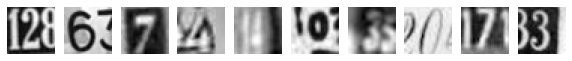

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

C. Reshape all the images with appropriate shape update the data in same variable.

In [59]:
# RESHAPE 2D - 32*32 into 1D - 1024
X_train = X_train.reshape(42000, 32*32)
X_val= X_val.reshape(X_val.shape[0], 32*32)
X_test = X_test.reshape(X_test.shape[0],32*32)

print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of X_val is {X_val.shape}')
print(f'Shape of X_test is {X_test.shape}')

Shape of X_train is (42000, 1024)
Shape of X_val is (60000, 1024)
Shape of X_test is (18000, 1024)


D. Normalise the images i.e. Normalise the pixel values. 

In [60]:
print(f'Min value for Train = {X_train.min()},Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Min value for Train = {X_train.max()},Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0,Validation =0.0, Test = 0.0 
Min value for Train = 254.97450256347656,Validation =254.97450256347656, Test = 254.97450256347656 


In [61]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


E. Transform Labels into format acceptable by Neural Network [

In [62]:
print(f'Sample value before one hot encode {y_train[0]}\n')
y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes=10)
y_val= tensorflow.keras.utils.to_categorical(y_val,num_classes=10)
y_test= tensorflow.keras.utils.to_categorical(y_test, num_classes=10)
print(f'Sample value after one hot encode {y_train[0]}')

Sample value before one hot encode 2

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


F. Print total Number of classes in the Dataset. 

Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


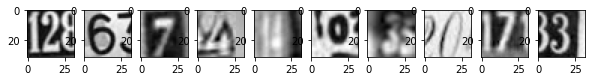

In [63]:
#cross check if we did all right
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

3. Model Training & Evaluation using Neural Network 

A. Design a Neural Network to train a classifier.

In [64]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [65]:
keras_model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 activation_14 (Activation)  (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 64)               

In [66]:
#Implementing batch normalization for training the neural network

keras_model_1 = Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

Using sgd optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor


In [68]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
#Batch Normalization ANN Compile
#Setting the learning rate  and decay in sgd
# compiling the ANN classifier
keras_model_1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [69]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 7s 30ms/step - loss: 2.2720 - accuracy: 0.1591 - val_loss: 2.2362 - val_accuracy: 0.1776
Epoch 2/10
210/210 [==============================] - 6s 29ms/step - loss: 2.2031 - accuracy: 0.2126 - val_loss: 2.1588 - val_accuracy: 0.2311
Epoch 3/10
210/210 [==============================] - 6s 29ms/step - loss: 2.1139 - accuracy: 0.2641 - val_loss: 2.0418 - val_accuracy: 0.3238
Epoch 4/10
210/210 [==============================] - 6s 29ms/step - loss: 2.0015 - accuracy: 0.3223 - val_loss: 1.8899 - val_accuracy: 0.3710
Epoch 5/10
210/210 [==============================] - 8s 39ms/step - loss: 1.8643 - accuracy: 0.3821 - val_loss: 1.7685 - val_accuracy: 0.4093
Epoch 6/10
210/210 [==============================] - 6s 31ms/step - loss: 1.7275 - accuracy: 0.4298 - val_loss: 1.7299 - val_accuracy: 0.4258
Epoch 7/10
210/210 [==============================] - 6s 29ms/step - loss: 1.6100 - accuracy: 0.4804 - val_loss: 1.5557 - val_accuracy: 0.4923

In [70]:
#Batch Normalization
# Fitting the Batch Normalization ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 8s 34ms/step - loss: 2.2125 - accuracy: 0.2137 - val_loss: 2.1455 - val_accuracy: 0.2291
Epoch 2/10
210/210 [==============================] - 7s 33ms/step - loss: 1.7811 - accuracy: 0.4113 - val_loss: 1.7498 - val_accuracy: 0.4307
Epoch 3/10
210/210 [==============================] - 8s 40ms/step - loss: 1.5114 - accuracy: 0.5259 - val_loss: 1.4668 - val_accuracy: 0.5362
Epoch 4/10
210/210 [==============================] - 9s 45ms/step - loss: 1.3200 - accuracy: 0.5957 - val_loss: 1.2880 - val_accuracy: 0.5978
Epoch 5/10
210/210 [==============================] - 9s 43ms/step - loss: 1.1765 - accuracy: 0.6415 - val_loss: 1.1594 - val_accuracy: 0.6421
Epoch 6/10
210/210 [==============================] - 10s 46ms/step - loss: 1.0654 - accuracy: 0.6763 - val_loss: 1.0886 - val_accuracy: 0.6607
Epoch 7/10
210/210 [==============================] - 9s 44ms/step - loss: 0.9786 - accuracy: 0.7012 - val_loss: 1.0400 - val_accuracy: 0.675

C. Evaluate performance of the model with appropriate metrics.

In [71]:
results_1 = keras_model.evaluate(X_val, y_val)
print('Val_acc using  ANN  : ', results_1[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 1.3272 - accuracy: 0.5615
Val_acc using  ANN  :  0.5615166425704956


In [72]:
results_2 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch Normalization ANN  : ', results_1[1])

1875/1875 [==============================] - 9s 5ms/step - loss: 0.8920 - accuracy: 0.7204
Val_acc using Batch Normalization ANN  :  0.5615166425704956


In [73]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['ANN'], 'accuracy': [results_1[1]]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val



,Method,accuracy
1,ANN,0.561517


In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['ANN_Normalization'], 'accuracy': [results_2[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val


,Method,accuracy
1,ANN,0.561517
2,ANN_Normalization,0.720433


Batch Normalization increases Accuracy

D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same. 

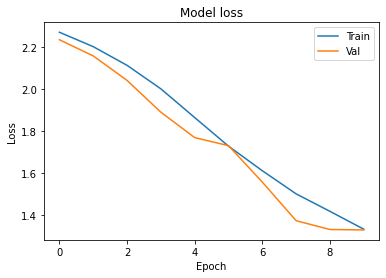

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

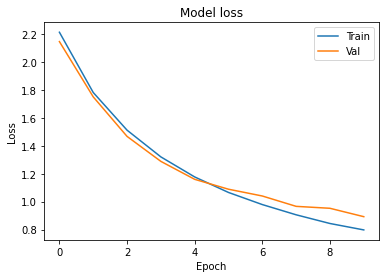

In [77]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Batch Normalization increased Accuracy 
Also Training/Validation loss curve is better in Normalization
